In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target.astype(int)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
X_train = X_train.T
X_test = X_test.T
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(784, 60000) (60000,)
(784, 10000) (10000,)


In [2]:
limit = np.sqrt(6 / (784 + 10))
w1 = np.random.uniform(-limit, limit, size=(10, 784))
print(w1)
w2 = np.random.uniform(-limit, limit, size=(10, 10))
print(w2)
b1 = np.zeros((10, 1))
print(b1)
b2 = np.zeros((10, 1))
print(b2)

parameters = {
    "w1": w1,
    "b1": b1,
    "w2": w2,
    "b2": b2
}

[[ 0.06868859 -0.00443177  0.00690721 ...  0.04785027 -0.00912944
  -0.01428972]
 [-0.06319536 -0.05400186 -0.06504152 ...  0.01620833  0.03647079
  -0.08117018]
 [-0.02869911  0.01334807  0.07712904 ... -0.02338141 -0.02868665
  -0.03058604]
 ...
 [ 0.04788772 -0.00865232 -0.05095581 ... -0.0702669   0.02346215
  -0.01799148]
 [ 0.06782698 -0.03561037  0.01635366 ...  0.03064166  0.01293914
  -0.05090599]
 [ 0.06953779 -0.07301258 -0.02242551 ... -0.08181438  0.05943035
  -0.0025869 ]]
[[-0.01910861  0.02593856  0.0520607  -0.05635335  0.06215013  0.08527684
   0.06064919 -0.07135151  0.04878359  0.02052869]
 [ 0.0497643  -0.05709965 -0.06403249 -0.01732221 -0.04986469  0.03167336
  -0.003252    0.04544231 -0.0171814  -0.08588252]
 [-0.05091333 -0.0357323   0.06098003  0.0143834   0.06873543 -0.00358735
   0.02330651 -0.07367083  0.0388706   0.07350921]
 [-0.03183797 -0.07401736 -0.04565161 -0.01910985 -0.05508289  0.0527071
  -0.06659323  0.02630762  0.06091757  0.00926402]
 [-0.0322

In [6]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

In [7]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

In [8]:
def compute_loss(A2, Y):
    m = Y.shape[1]
    return -np.sum(Y * np.log(A2 + 1e-8)) / m

In [10]:
def forwardprop(X_train, parameters):
    w1, w2, b1, b2 = parameters['w1'], parameters['w2'], parameters['b1'], parameters['b2']
    z1 = np.dot(w1, X_train)+b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1)+b2
    a2 = softmax(z2)
    cache = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }
    # print(X_train.T.shape)
    # print(w1.shape)
    # print(a1.shape)
    # print(b1.shape)
    # print(w2.shape)
    # print(a2.shape)
    # print(b2.shape)
    return cache

In [ ]:
def one_hot_encode(y, num_classes=10):
    m = y.shape[0]
    one_hot = np.zeros((num_classes, m))
    one_hot[y, np.arange(m)] = 1
    return one_hot

In [ ]:
Y_train = one_hot_encode(y_train)
Y_test = one_hot_encode(y_test)    

In [12]:
def backprop(X_train, Y_train, parameters, cache):
    w1, w2 = parameters["w1"], parameters["w2"]
    z1, a1, a2 = cache["z1"], cache["a1"], cache["a2"]
    m = X_train.shape[1]

    dz2 = a2 - Y_train
    dw2 = (1/m) * np.dot(dz2, a1.T)
    db2 = (1/m) * np.sum(dz2, axis=1, keepdims=True)

    da1 = np.dot(w2.T, dz2)
    dz1 = da1 * relu_derivative(z1)
    dw1 = (1/m) * np.dot(dz1, X_train.T)
    db1 = (1/m) * np.sum(dz1, axis=1, keepdims=True)

    grads = {
        "dw1": dw1,
        "dw2": dw2,
        "dz1": dz1,
        "dz2": dz2,
        "db1": db1,
        "db2": db2
    }
    return grads

In [ ]:
epochs = 500
for i in range(epochs):
    cache = forwardprop(X_train, parameters)
    A2 = cache["a2"]
    loss = compute_loss(A2, Y_train)
    grads = backprop(X_train, Y_train, parameters, cache)
    
    lr = 0.7

    parameters["w1"] -= lr * grads["dw1"]
    parameters["b1"] -= lr * grads["db1"]
    parameters["w2"] -= lr * grads["dw2"]
    parameters["b2"] -= lr * grads["db2"]

    if i%50==0:
        print(f"Epoch {i}: loss = {loss:.4f}")

In [ ]:
predictions = np.argmax(A2, axis=0)
labels = y_train
accuracy = np.mean(predictions == labels)
print("Accuracy:", accuracy)

In [17]:
test_cache = forwardprop(X_test, parameters)
test_A2 = test_cache["a2"]
test_predictions = np.argmax(test_A2, axis=0)
test_labels = y_test
test_accuracy = np.mean(test_predictions == test_labels)
print("Accuracy:", test_accuracy)

Accuracy: 0.9156


In [13]:
def predict(X, parameters):
    cache = forwardprop(X, parameters)
    probs = cache["a2"]
    prediction = np.argmax(probs, axis=0)
    return prediction

In [ ]:
from PIL import Image
import numpy as np
img = Image.open("pixelart9.png").convert("L")
img = img.resize((28, 28))
img_array = np.array(img)
img_array = 255 - img_array
img_array = img_array / 255.0
image_test = img_array.reshape(784,1)

predicted_value = predict(image_test, parameters)
print(predicted_value)

[3]


[3]


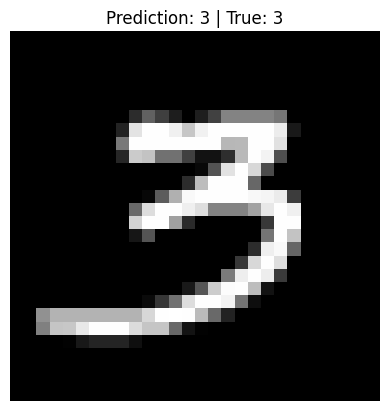

In [18]:
import matplotlib.pyplot as plt

idx = 1321
sample = X_test.iloc[:, idx].to_numpy().reshape(784, 1)
true_label = y_test.iloc[idx]

predicted_label = predict(sample, parameters)
print(predicted_label)


plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {predicted_label[0]} | True: {true_label}")
plt.axis('off')
plt.show()


In [ ]:
np.savez("mnist_model.npz", w1=w1, b1=b1, w2=w2, b2=b2)
print("Model saved successfully!")

In [15]:
parameters = np.load("mnist_model.npz")